In [ ]:
import numpy as np
import math 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data=pd.read_csv("population data - Sheet1.csv",header=None)

In [ ]:
data

In [ ]:
d=pd.DataFrame(data)

In [ ]:
x_=pd.to_numeric(d.iloc[0,1:])

In [ ]:
y_=pd.to_numeric(d.iloc[4,1:])

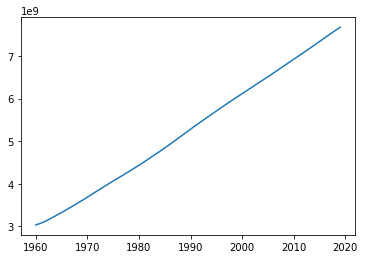

In [ ]:
plt.plot(x_, y_)

Curve fitting-Exponential

(-9.300501371838674, 0.015906861837129742)


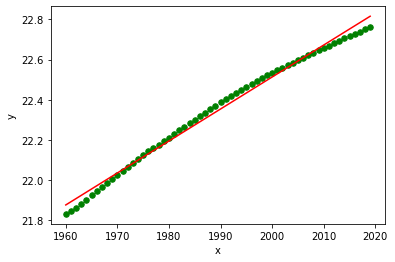

In [ ]:
def estimate_coef(x, y): 
    n = np.size(x)
  
    m_x, m_y = np.mean(x), np.mean(y) 
  
    SS_xy = n*np.sum(y*x) - n*n*m_y*m_x 
    SS_xx = n*np.sum(x*x) -n*n*m_x*m_x 
  
    a_1 = SS_xy / SS_xx 
    a_0 = m_y - a_1*m_x 
  
    return(a_0, a_1) 
  
def plot_regression_line(x, y, a): 
    plt.scatter(x, y, color = "g", 
               marker = "o", s = 30) 

    y_pred = a[0] + a[1]*x 

    plt.plot(x, y_pred, color = "r") 
  
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    plt.show() 
  
x=x_ 
y=np.log(y_)    
a = estimate_coef(x, y) 
print(a)   
plot_regression_line(x, y, a) 

In [ ]:
N0=math.exp(a[0])
l=a[1]

In [ ]:
l

0.015906861837129742

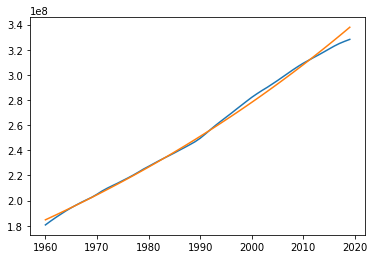

In [ ]:
y=N0*np.exp(l*x)
plt.plot(x_, y_)
plt.plot(x_, y)

Fertility

In [ ]:
d1=pd.read_csv("Fertility_rate _data - Sheet1.csv",header=None)

In [ ]:
d1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,year,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,1966.000000,1967.000000,1968.00000,1969.000000,1970.000000,1971.000000,1972.000000,1973.000000,1974.000000,1975.000000,1976.000000,1977.000000,1978.00000,1979.000000,1980.000000,1981.00000,1982.000000,1983.000000,1984.00000,1985.000000,1986.00000,1987.000000,1988.000000,1989.000000,1990.000000,1991.000000,1992.000000,1993.000000,1994.00000,1995.000000,1996.00000,1997.000000,1998.000000,1999.000000,2000.000000,2001.000000,2002.000000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.00000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000
1,India,5.906000,5.902000,5.894000,5.880000,5.859000,5.830000,5.794000,5.751000,5.70200,5.648000,5.587000,5.519000,5.444000,5.363000,5.278000,5.192000,5.108000,5.029000,4.95600,4.889000,4.827000,4.76600,4.703000,4.636000,4.56300,4.484000,4.39900,4.311000,4.222000,4.132000,4.045000,3.959000,3.877000,3.799000,3.72300,3.651000,3.58200,3.514000,3.446000,3.379000,3.311000,3.244000,3.176000,3.109000,3.041000,2.972000,2.899000,2.823000,2.743000,2.661000,2.581000,2.50600,2.439000,2.381000,2.333000,2.295000,2.266000,2.243000,2.222000
2,Madagascar,7.300000,7.301000,7.303000,7.305000,7.307000,7.308000,7.307000,7.304000,7.29700,7.286000,7.270000,7.248000,7.221000,7.188000,7.149000,7.102000,7.044000,6.976000,6.89800,6.813000,6.725000,6.63700,6.554000,6.477000,6.41000,6.353000,6.30700,6.270000,6.237000,6.208000,6.179000,6.149000,6.116000,6.078000,6.03300,5.979000,5.91200,5.835000,5.748000,5.653000,5.551000,5.447000,5.342000,5.240000,5.141000,5.047000,4.956000,4.866000,4.777000,4.689000,4.603000,4.52000,4.442000,4.369000,4.302000,4.241000,4.184000,4.130000,4.077000
3,United States,3.654000,3.620000,3.461000,3.319000,3.190000,2.913000,2.721000,2.558000,2.46400,2.456000,2.480000,2.266000,2.010000,1.879000,1.835000,1.774000,1.738000,1.790000,1.76000,1.808000,1.839500,1.81200,1.827500,1.799000,1.80650,1.844000,1.83750,1.872000,1.934000,2.014000,2.081000,2.062500,2.046000,2.019500,2.00150,1.978000,1.97600,1.971000,1.999000,2.007500,2.056000,2.030500,2.020500,2.047500,2.051500,2.057000,2.108000,2.120000,2.072000,2.002000,1.931000,1.89450,1.880500,1.857500,1.862500,1.843500,1.820500,1.765500,1.729500
4,World,4.980115,5.002561,5.024329,5.044498,5.055422,5.039678,4.990907,4.972375,4.92204,4.855084,4.777741,4.669267,4.539702,4.410907,4.288771,4.156651,4.040384,3.936742,3.84308,3.773425,3.713665,3.65662,3.627169,3.594588,3.56422,3.536016,3.49952,3.455153,3.398926,3.324333,3.248472,3.157393,3.071605,2.987709,2.92192,2.862563,2.81697,2.777102,2.746181,2.716363,2.696003,2.666301,2.643689,2.624824,2.608544,2.587982,2.577096,2.567092,2.555026,2.534249,2.516363,2.49876,2.489334,2.472966,2.465593,2.456208,2.445518,2.428138,2.414974


In [ ]:
d1=pd.DataFrame(d1)

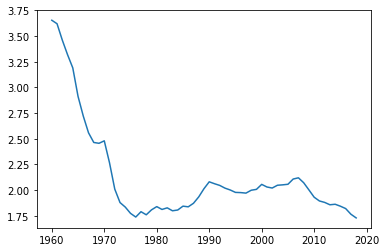

In [ ]:
y_=pd.to_numeric(d1.iloc[3,1:])
x_=pd.to_numeric(d1.iloc[0,1:])
plt.plot(x_, y_, label = "line 1")

(13.690371289716424, -0.006513043366534625)


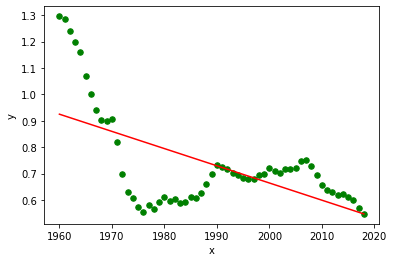

In [ ]:
def estimate_coef(x, y): 
    n = np.size(x)
  
    m_x, m_y = np.mean(x), np.mean(y) 
  
    SS_xy = n*np.sum(y*x) - n*n*m_y*m_x 
    SS_xx = n*np.sum(x*x) -n*n*m_x*m_x 
  
    a_1 = SS_xy / SS_xx 
    a_0 = m_y - a_1*m_x 
  
    return(a_0, a_1) 
  
def plot_regression_line(x, y, a): 
    plt.scatter(x, y, color = "g", 
               marker = "o", s = 30) 

    y_pred = a[0] + a[1]*x 
  
    plt.plot(x, y_pred, color = "r") 
  
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    plt.show() 
  
x=x_ 
y=np.log(y_)    
a = estimate_coef(x, y) 
print(a)   
plot_regression_line(x, y, a) 

In [ ]:
N0=math.exp(a[0])
l=a[1]

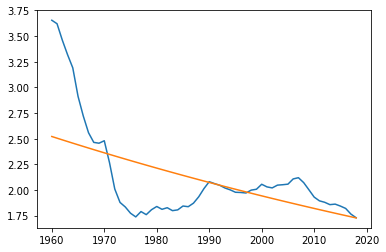

In [ ]:
y=N0*np.exp(l*x)
plt.plot(x_, y_)
plt.plot(x_, y)

## Euler's Method

In [ ]:
def euler(f,a,b,n,No):
  h = (b-a)/(n-1)
  ts = a + np.arange(n)*h
  ns = np.zeros(n)
  n = No
  for j,t in enumerate(ts):
    ns[j] = n
    n += h*f(t, n)
  return ts, ns

## RK-4 Method

In [ ]:
def rk4(f,a,b,n,No):
  h = (b-a)/(n-1)
  ts = a + np.arange(n)*h
  ns = np.zeros(n)
  n = No
  for j,t in enumerate(ts):
    ns[j] = n
    k0 = h*f(t, n)
    k1 = h*f(t+h/2, n+k0/2)
    k2 = h*f(t+h/2, n+k1/2)
    k3 = h*f(t+h, n+k2)
    n += (k0 + 2*k1 + 2*k2 + k3)/6
  return ts, ns
  

## Population Model (Exponential Model)
### $$dN/dt=rN$$ N= population as a function of time, r= proportionality constant
### $$
N(t) = N_0 e^{rt},
$$ No= population at time t=0






### 1. Madagascar
r=0.02886290941170391, No=5099373



In [ ]:
def f(t,n):
  r=0.02886290941170391
  return r*n   #we are defining the differential equation here

### Euler's Method

In [ ]:
t, n= euler(f, 1960, 2030, 69,5099373 )

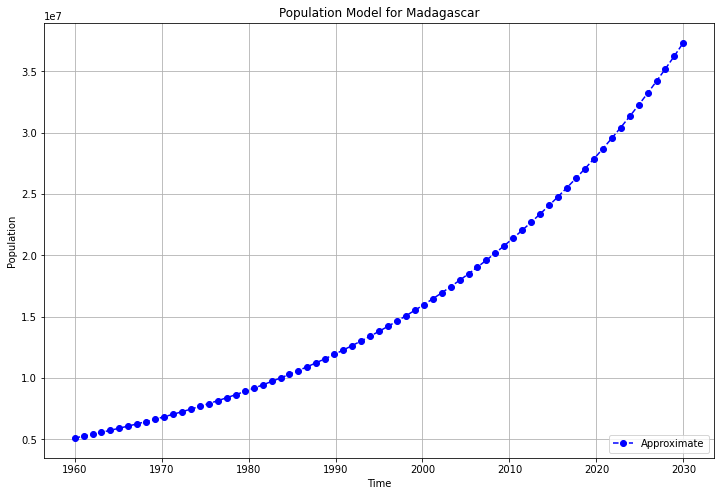

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(t, n, 'bo--', label='Approximate')
plt.title('Population Model for Madagascar')
plt.xlabel('Time')
plt.ylabel('Population')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### RK-4 Method

In [ ]:
t1, n1= rk4(f, 1960, 2030, 69,5099373 )

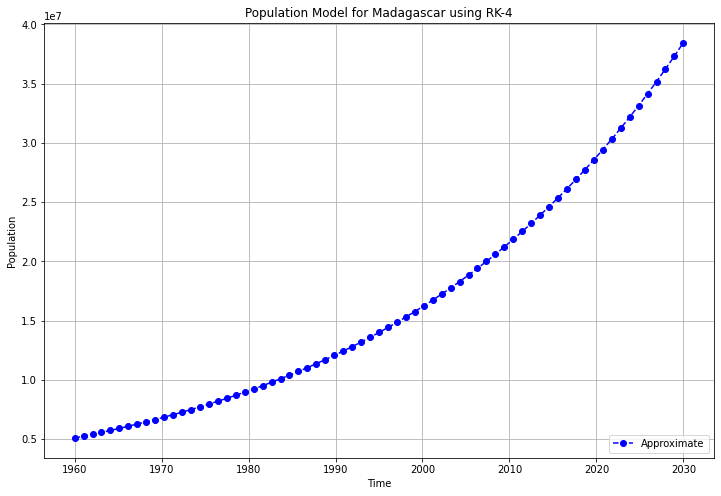

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(t1, n1, 'bo--', label='Approximate')
plt.title('Population Model for Madagascar using RK-4')
plt.xlabel('Time')
plt.ylabel('Population')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## India
r=0.01965563394203113, No=450547679	

In [ ]:
def f(t,n):
  r=0.01965563394203113
  return r*n

### Euler's Method

In [ ]:
t, n= euler(f, 1960, 2030, 69, 450547679 )

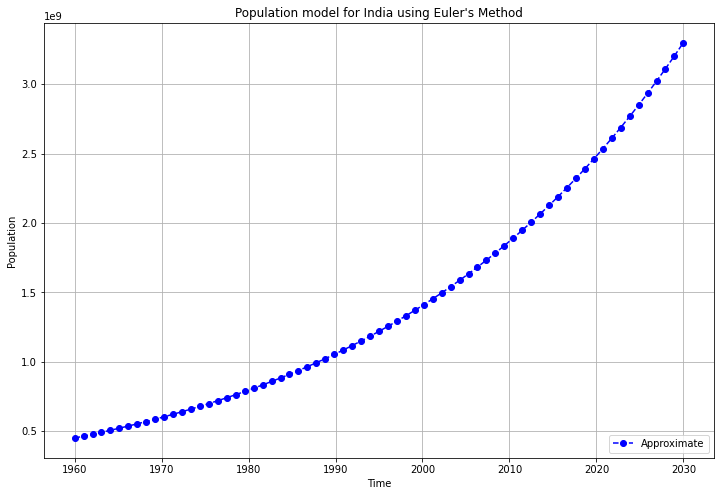

In [ ]:

plt.figure(figsize = (12, 8))
plt.plot(t, n, 'bo--', label='Approximate')
plt.title("Population model for India using Euler's Method")
plt.xlabel('Time')
plt.ylabel('Population')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### RK-4 Method

In [ ]:
t1, n1= rk4(f, 1960, 2030, 69, 450547679 )

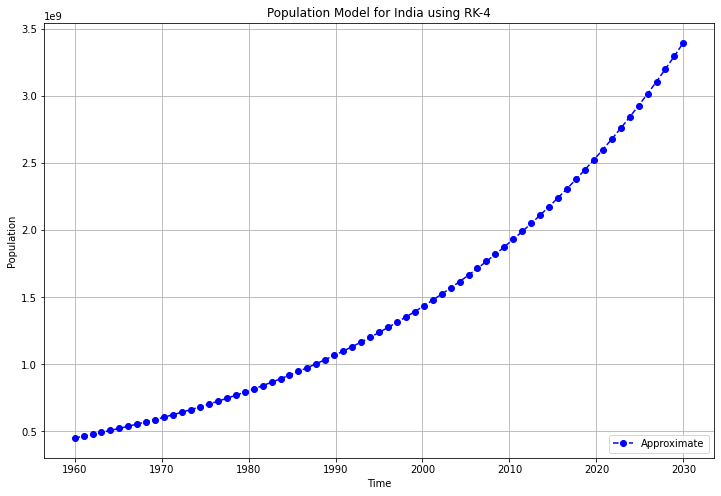

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(t1, n1, 'bo--', label='Approximate')
plt.title('Population Model for India using RK-4')
plt.xlabel('Time')
plt.ylabel('Population')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## USA
r=0.010234409905400798, No=180671000	

In [ ]:
def f(t,n):
  r=0.010234409905400798
  return r*n

### Euler's Method

In [ ]:
t, n= euler(f, 1960, 2030, 69, 180671000 )

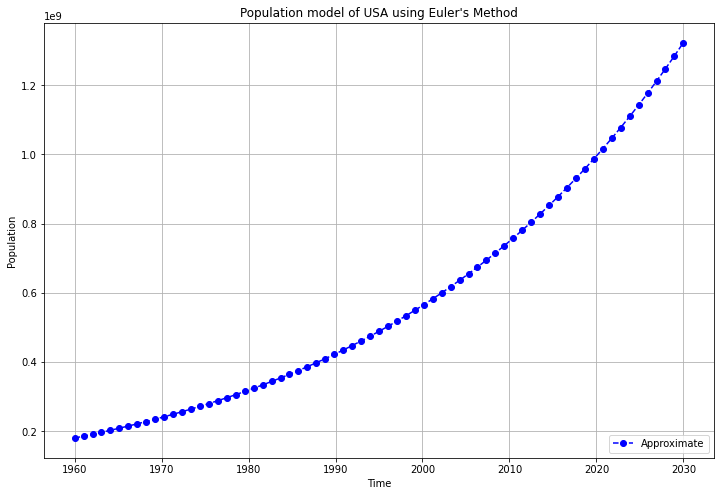

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(t, n, 'bo--', label='Approximate')
plt.title("Population model of USA using Euler's Method")
plt.xlabel('Time')
plt.ylabel('Population')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### RK-4 Method

In [ ]:
t1, n1= rk4(f, 1960, 2030, 69, 180671000 )

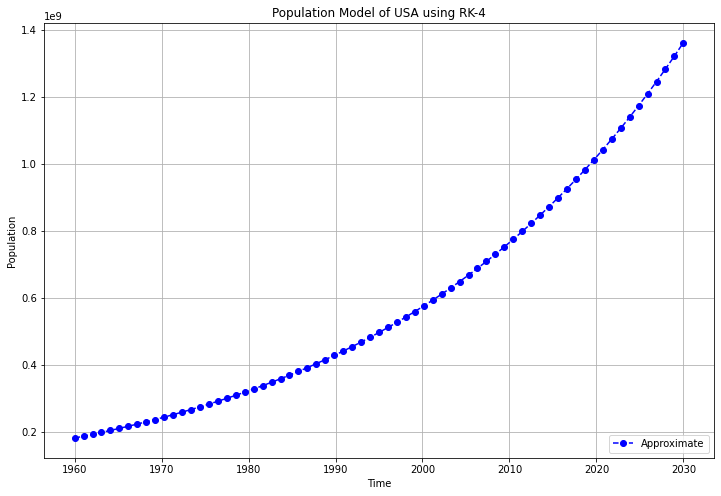

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(t1, n1, 'bo--', label='Approximate')
plt.title('Population Model of USA using RK-4')
plt.xlabel('Time')
plt.ylabel('Population')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## World
r=0.015906861837129742, No=3031437768	

In [ ]:
def f(t,n):
  r=0.015906861837129742
  return r*n

### Euler's Method

In [ ]:
t, n= euler(f, 1960, 2030, 69, 3031437768)

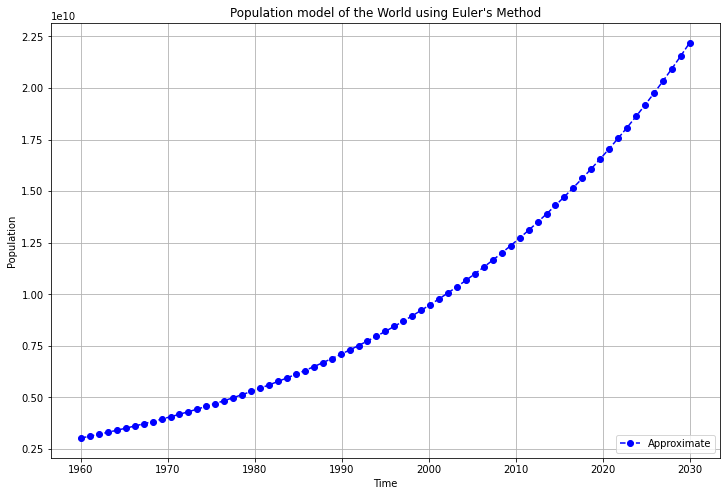

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(t, n, 'bo--', label='Approximate')
plt.title("Population model of the World using Euler's Method")
plt.xlabel('Time')
plt.ylabel('Population')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### RK-4 Method

In [ ]:
t1, n1= rk4(f, 1960, 2030, 69, 3031437768)

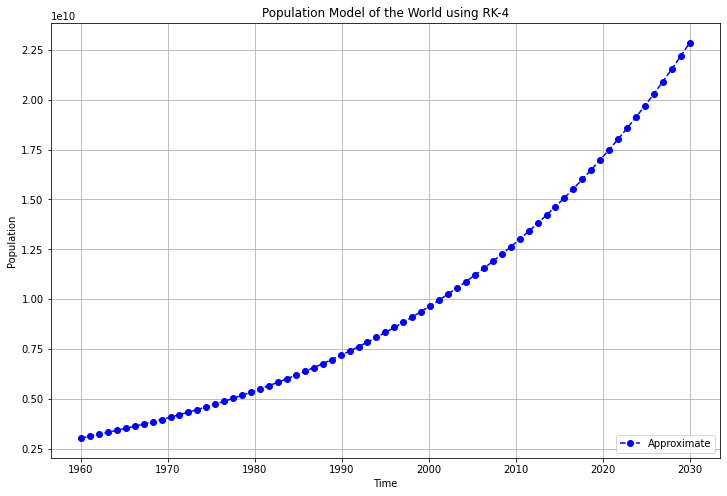

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(t1, n1, 'bo--', label='Approximate')
plt.title('Population Model of the World using RK-4')
plt.xlabel('Time')
plt.ylabel('Population')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
c=0.0035429 
d=-3.61298*10**-11 

In [ ]:
def p(t):
  return p

In [ ]:
def f(t,p):
  c=0.0035429  
  d=-3.61298*10**-11  
  k= (p*c*(c-d*p))/c
  return k

In [ ]:
t1, p1=rk4(f, 1960, 2019, 59, 450547679)

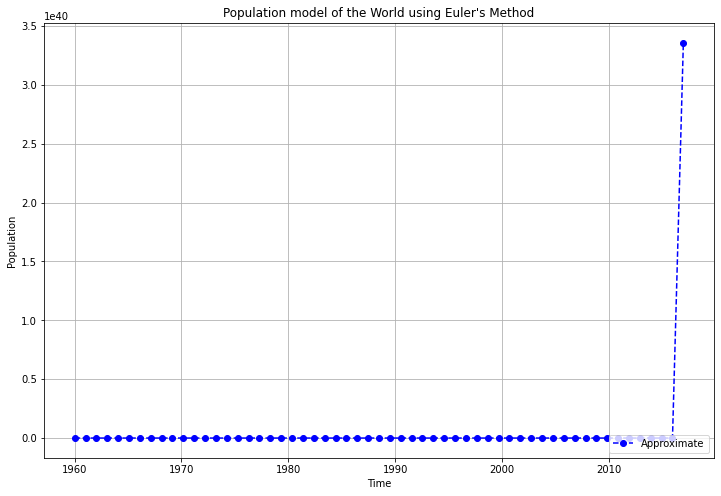

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(t1, p1, 'bo--', label='Approximate')
plt.title("Population model of the World using Euler's Method")
plt.xlabel('Time')
plt.ylabel('Population')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Polynomial Regression


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving Fertility_rate _data.xlsx to Fertility_rate _data.xlsx


In [ ]:
df=pd.read_excel("Fertility_rate _data.xlsx",header=None)
print(df)

              0            1   ...           58           59
0           year  1960.000000  ...  2017.000000  2018.000000
1          India     5.906000  ...     2.243000     2.222000
2     Madagascar     7.300000  ...     4.130000     4.077000
3  United States     3.654000  ...     1.765500     1.729500
4          World     4.980115  ...     2.428138     2.414974

[5 rows x 60 columns]


In [ ]:
df1=df.iloc[4]
df1

0       World
1     4.98011
2     5.00256
3     5.02433
4      5.0445
5     5.05542
6     5.03968
7     4.99091
8     4.97237
9     4.92204
10    4.85508
11    4.77774
12    4.66927
13     4.5397
14    4.41091
15    4.28877
16    4.15665
17    4.04038
18    3.93674
19    3.84308
20    3.77343
21    3.71366
22    3.65662
23    3.62717
24    3.59459
25    3.56422
26    3.53602
27    3.49952
28    3.45515
29    3.39893
30    3.32433
31    3.24847
32    3.15739
33     3.0716
34    2.98771
35    2.92192
36    2.86256
37    2.81697
38     2.7771
39    2.74618
40    2.71636
41      2.696
42     2.6663
43    2.64369
44    2.62482
45    2.60854
46    2.58798
47     2.5771
48    2.56709
49    2.55503
50    2.53425
51    2.51636
52    2.49876
53    2.48933
54    2.47297
55    2.46559
56    2.45621
57    2.44552
58    2.42814
59    2.41497
Name: 4, dtype: object

In [ ]:
fertility=df1.to_numpy()
fertility

array(['World', 4.980114876, 5.00256131, 5.0243292182, 5.0444980345,
       5.0554217798, 5.0396784827, 4.9909071202, 4.9723747854,
       4.9220400721, 4.8550840715, 4.777740906, 4.6692672801,
       4.5397018077, 4.4109065138, 4.2887707515, 4.1566509824,
       4.0403838195, 3.9367423747, 3.8430802605, 3.7734252926,
       3.7136645534, 3.6566199719, 3.6271685432, 3.5945875668,
       3.5642202465, 3.5360158307, 3.4995204987, 3.4551526012,
       3.3989259961, 3.3243333382, 3.2484723326, 3.1573927391,
       3.0716049009, 2.9877092549, 2.921920469, 2.8625628199,
       2.8169700628, 2.777102018, 2.7461806492, 2.7163632619,
       2.6960028984, 2.6663010369, 2.6436885911, 2.6248241353,
       2.6085438927, 2.5879821792, 2.5770962897, 2.5670920958,
       2.5550260608, 2.5342493818, 2.5163627174, 2.4987601161,
       2.4893342196, 2.472965518, 2.4655930275, 2.4562079356,
       2.4455184976, 2.4281375986, 2.4149736522], dtype=object)

In [ ]:
year=np.zeros((59))
i=0
for i in range(59):
    year[i]=1960+i
print(year)    

[1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971.
 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983.
 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995.
 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007.
 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.]


In [ ]:
P=np.zeros((59))
for i in range(59):
    P[i]=fertility[i+1]
print(P)    

[4.98011488 5.00256131 5.02432922 5.04449803 5.05542178 5.03967848
 4.99090712 4.97237479 4.92204007 4.85508407 4.77774091 4.66926728
 4.53970181 4.41090651 4.28877075 4.15665098 4.04038382 3.93674237
 3.84308026 3.77342529 3.71366455 3.65661997 3.62716854 3.59458757
 3.56422025 3.53601583 3.4995205  3.4551526  3.398926   3.32433334
 3.24847233 3.15739274 3.0716049  2.98770925 2.92192047 2.86256282
 2.81697006 2.77710202 2.74618065 2.71636326 2.6960029  2.66630104
 2.64368859 2.62482414 2.60854389 2.58798218 2.57709629 2.5670921
 2.55502606 2.53424938 2.51636272 2.49876012 2.48933422 2.47296552
 2.46559303 2.45620794 2.4455185  2.4281376  2.41497365]


In [ ]:
Errortable=np.zeros((30))
equation=np.zeros(([30,30]))
for n in range(1,30):
    AUGM=np.zeros(([n+1,n+1]))
    AUGM2=np.zeros(n+1)
    i=0
    j=0
    for i in range (n+1):
        for j in range (n+1):
            sum=0
            for k in range(np.size(P)):
                sum= sum+((year[k])**(j+i))
            
            AUGM[j][i]= sum
    
    for h in range(n+1):
        sum=0
        for k in range(np.size(P)):
            sum=sum+(P[k]*(year[k]**h))
        
        AUGM2[h]=sum 
    m = n+1
    x=[0]*m
    for k in range(0,m-1):
        for i in range(k+1,m):
            factor = AUGM[i][k]/AUGM[k][k]
            for j in range(k+1,m):
                AUGM[i][j]=AUGM[i][j]-factor*AUGM[k][j]
            AUGM2[i]=AUGM2[i]-factor*AUGM2[k]

    x[m-1]=AUGM2[m-1]/AUGM[m-1][m-1]
    for i in range(n-1,-1,-1):
        sum = AUGM2[i]
        for j in range(i+1,m):
            sum = sum - AUGM[i][j]*x[j]
        x[i] = sum/AUGM[i][i]

    Sr=0
    for q in range(59):
        sum2=0
        for e in range(m):
            sum2=sum2+ (x[e]*(year[q]**e))
      
        Sr=Sr+((P[q]-(sum2))**2)
    Sterror= (Sr/(60-(n+1)))**(1/2)  
    print(Sterror)
    Errortable[n]=Sterror
    for i in range(m):
        equation[n][i]=x[i]
     
print(AUGM[0][0],AUGM[1][0])

0.22928974194951363
0.12143553539569234
0.10088781754517133
0.10188099777570178
0.10314622210232084
0.10314971023835638
0.11025110241096531
0.10266471645895939
0.12713873987953753
0.0958489902385827
0.09709052066425707
0.0891401664194104
0.09018060037010699
0.09086364246094743
0.09251785814281342
0.0936645419545587
0.09403277467455254
0.0956273752979432
0.09753846188082681
0.1043612455663099
0.10881298222029966
0.0916782397818727
0.09224758456309061
0.09355876644276966
0.09960356207619332
0.09595988436732734
0.09953048286576283
0.3407645614639792
0.10518033810909028
59.0 117351.0


In [ ]:
dummy =Errortable[1]
degree=1
for i in range(2,30):
    if Errortable[i]<=dummy:
        dummy=Errortable[i]
        degree=i
print("degree=",degree,",standard error=", dummy,)        

degree= 12 ,standard error= 0.0891401664194104


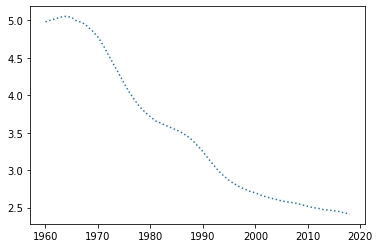

In [ ]:
plt.plot(year,P,linestyle='dotted')

In [ ]:
equation[degree]

array([-3.53534021e+05,  2.25124269e+02,  1.13774280e-02,  6.40586784e-06,
       -2.23968694e-09, -1.01346271e-12,  1.14209111e-15, -3.06226827e-18,
        1.42571383e-22, -1.11668499e-24,  6.70921840e-28,  2.94733913e-31,
       -1.37138851e-34,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [ ]:
y=0
for i in range(degree+1):
    y=y+(equation[degree][i]*(year**i))

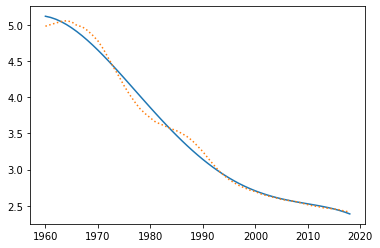

In [ ]:
plt.plot(year,y,linestyle='solid')
plt.plot(year,P,linestyle='dotted')

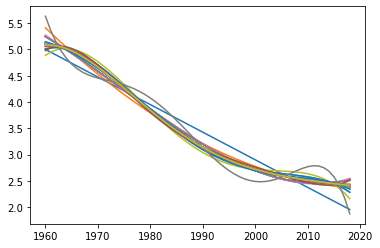

In [ ]:

for i in range(1,30):
    v=0
    for j in range(30):
        v=v+equation[i][j]*(year**j)
        
    plt.plot(year,v)
    